### Importing Modules

In [1]:
import pandas as pd # For DataFrame
import numpy as np # For creating arrays 
import matplotlib.pyplot as plt # For visualization
import geopandas as gpd # For world-map import

### Importing the Dataset

In [2]:
corona_dataset_csv = pd.read_csv("Covid19_Confirmed_dataset.csv")

In [3]:
corona_dataset_csv

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Data Cleaning

In [4]:
corona_dataset_csv.drop(['Province/State'], axis=1, inplace=True)

In [5]:
corona_dataset_csv

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Grouping By The Countries In A New DataFrame 

In [6]:
agg = corona_dataset_csv.groupby(['Country/Region']).sum()

### Adding another column for Maximum Infection Rate in a country

In [7]:
country = list(agg.index) #converted to list
max_infection_rate = [] 
for c in country: 
    max_infection_rate.append(agg.loc[c].diff().max())

agg["max_infection_rate"]= max_infection_rate

In [8]:
agg

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.000000
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.000000
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.000000
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.000000
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,29.076600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.000000
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,12.885800
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,32.963661


### Visualizing The Data

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [10]:
x = agg['Long']
y = agg['Lat']
z = agg['max_infection_rate']

Text(75.875, 0.5, 'Latitude')

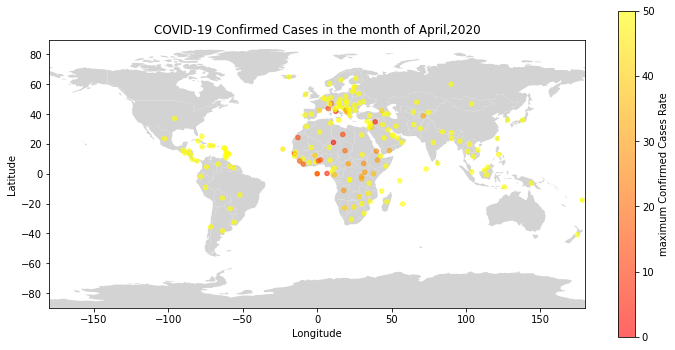

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))
world.plot(color="lightgrey", ax=ax)


plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.scatter(x, y, s=20, c=z, alpha=0.6, vmin=0, vmax=50,
            cmap='autumn')
plt.colorbar(label='maximum Confirmed Cases Rate')

plt.title("COVID-19 Confirmed Cases in the month of April,2020")
plt.xlabel("Longitude")
plt.ylabel("Latitude")